In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

df = pd.read_csv("C:/Users/syjwk/Study_AI/AI_Class/2week/assignment/titanic.csv", index_col=0)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [60]:
print(df.isnull().sum())  

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


### 결측치 출력
Age, Cabin, Embarked에 결측치가 존재한다는 것을 알 수 있다. <p>
Age는 생존여부와 관련이 있기 때문에 없는 부분을 평균으로 채워서 해결한다. 

In [62]:
mean_age = df['Age'].mean()  
df['Age'] = df['Age'].fillna(mean_age)

print(df.isnull().sum())  

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


### 결측치 제거
결측치가 존재헀던 부분에 Age의 평균 나이를 입력했다. 

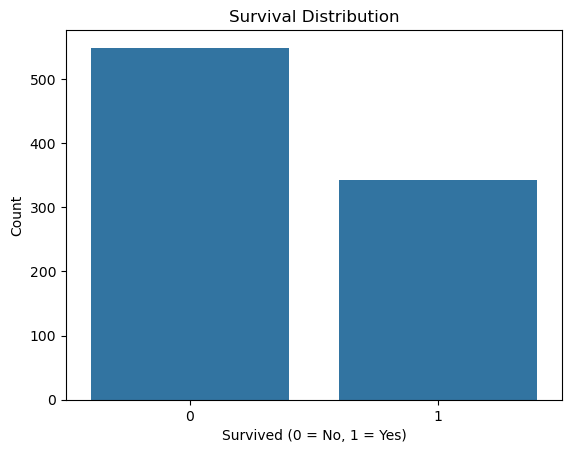

Survived
0    549
1    342
Name: count, dtype: int64


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(df['Survived'].value_counts())

### 레이블 확인
그래프를 사용해서 **Survived**에 대해 판단해보았다. <p>
**Survived**로 한 이유는 titanic 데이터셋에서 **Survived** Column이 목표 변수이기 때문이다. <p>
목표변수 : 내가 예측하고 싶은 정보

In [68]:
columns_to_delete = ['Name', 'Ticket', 'Cabin', 'Embarked']

df = df.drop(columns=columns_to_delete)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.000000,1,0,7.2500
2,1,1,female,38.000000,1,0,71.2833
3,1,3,female,26.000000,0,0,7.9250
4,1,1,female,35.000000,1,0,53.1000
5,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000
888,1,1,female,19.000000,0,0,30.0000
889,0,3,female,29.699118,1,2,23.4500


### Column 삭제
Name, Ticket, Cabin, Embarked는 생존율과 상관 없는 데이터라고 판단해서 Column에서 삭제시켰다. 

In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Sex']  

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head()) 

             Survived  Pclass  Sex   Age  SibSp  Parch     Fare
PassengerId                                                    
1                   0       3    1  22.0      1      0   7.2500
2                   1       1    0  38.0      1      0  71.2833
3                   1       3    0  26.0      0      0   7.9250
4                   1       1    0  35.0      1      0  53.1000
5                   0       3    1  35.0      0      0   8.0500


### Encoding(성별)
성별은 문자열 데이터로 이루어져있기 때문에 수치형 데이터로 바꿔야한다. 

### 5가지 분류 (RF, DT, LR, KNN, SVM) accuracy 및 confusion matrix 확인

In [76]:
X=df.drop('Survived',axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500


Survived 여부를 파악하기 위함이기 때문에 Survived를 제외

In [81]:
y=df['Survived']
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Y에 Survived를 넣어 결과값으로 함

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=0)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.8324022346368715
[[100  10]
 [ 20  49]]


모델의 정확도는 83.24%이다. <p>
- [100 10] <p>
100: 모델이 생존으로 예측한 사람 중 실제로 생존한 사람의 수 <p> 
10: 모델이 생존으로 예측한 사람 중 실제로는 사망한 사람의 수 <p>
- [20 49] <p>
20: 모델이 사망으로 예측한 사람 중 실제로는 생존한 사람의 수 <p>
49: 모델이 사망으로 예측한 사람 중 실제로 사망한 사람의 수 <p>

In [99]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7877094972067039
[[95 15]
 [23 46]]


모델의 정확도는 78.77%이다. <p>
- [95 15] <p>
95: 모델이 생존으로 예측한 사람 중 실제로 생존한 사람의 수 <p> 
15: 모델이 생존으로 예측한 사람 중 실제로는 사망한 사람의 수 <p>
- [23 46] <p>
23: 모델이 사망으로 예측한 사람 중 실제로는 생존한 사람의 수 <p>
46: 모델이 사망으로 예측한 사람 중 실제로 사망한 사람의 수 <p>

In [116]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7988826815642458
[[94 16]
 [20 49]]


모델의 정확도는 79.88%이다. <p>
- [94 16] <p>
94: 모델이 생존으로 예측한 사람 중 실제로 생존한 사람의 수 <p> 
16: 모델이 생존으로 예측한 사람 중 실제로는 사망한 사람의 수 <p>
- [20 49] <p>
20: 모델이 사망으로 예측한 사람 중 실제로는 생존한 사람의 수 <p>
49: 모델이 사망으로 예측한 사람 중 실제로 사망한 사람의 수 <p>

In [128]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7206703910614525
[[104   6]
 [ 44  25]]


모델 정확도는 72.06%이다. <p>
- [104 6] <p>
104: 모델이 생존으로 예측한 사람 중 실제로 생존한 사람의 수 <p> 
6: 모델이 생존으로 예측한 사람 중 실제로는 사망한 사람의 수 <p>
- [23 46] <p>
44: 모델이 사망으로 예측한 사람 중 실제로는 생존한 사람의 수 <p>
25: 모델이 사망으로 예측한 사람 중 실제로 사망한 사람의 수 <p>

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

clf_knn = KNeighborsClassifier(n_neighbors=5) 
clf_knn.fit(X_train, y_train)

pred_knn = clf_knn.predict(X_test)

print("\n--- KNN Classifier ---")
print(accuracy_score(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))


--- KNN Classifier ---
0.7262569832402235
[[89 21]
 [28 41]]


모델의 정확도는 72.65%이다. <p>
- [89 21] <p>
89: 모델이 생존으로 예측한 사람 중 실제로 생존한 사람의 수 <p> 
21: 모델이 생존으로 예측한 사람 중 실제로는 사망한 사람의 수 <p>
- [28 41] <p>
28: 모델이 사망으로 예측한 사람 중 실제로는 생존한 사람의 수 <p>
41: 모델이 사망으로 예측한 사람 중 실제로 사망한 사람의 수 <p>

RT이 가장 정확도가 높게 나왔고 SVM이 가장 정확도가 낮게 나왔다.